# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

#Access maps with gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#lat_lngs = zip(lats, lngs)
#list_lats_lngs = list(lat_lngs)
#print(list_lats_lngs)

994

In [3]:
#Seeing how spread out the coordinates are to ensure full coverage of the globe
#figure_layout = {
#    'width': '400px',
#    'height': '300px',
#    'border': '1px solid black',
#    'padding': '1px',
#    'margin': '0 auto 0 auto'}

#fig = gmaps.figure(layout=figure_layout)
#markers = gmaps.marker_layer(list_lats_lngs)
#fig.add_layer(markers)
#fig

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_sets = []
weather_list = []

for x in range(1,15):
    city_set = random.sample(cities, 50)
    city_sets.append(city_set)

print("Beginning Data Retrieval")
print("------------------------")    

weather_list = []
    
for city in cities:
        if len(weather_list) == 1000:
            print("End of Data Retrieval")
            break
        try:
            print(f"Processing Record {cities.index(city) + 1} | {city}")

            city_url = url + "appid=" + api_key + "&q=" + city
            response = requests.get(city_url)
            city_weather = response.json()    

            weather_list.append({
                "City": city_weather['name'],
                "Country": city_weather['sys']['country'],
                "Temperature": (city_weather['main']['temp'] - 273.15),
                "Humidity": city_weather['main']['humidity'],
                "Cloudiness": city_weather['clouds']['all'],
                "Max Temp": (city_weather['main']['temp_max'] - 273.15),
                "Wind Speed": city_weather['wind']['speed'],
                "Latitude": city_weather['coord']['lat'],
                "Longitude": city_weather['coord']['lon']
            })
        except KeyError:
            print("City not found.  Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 1 | nizhniy kuranakh
Processing Record 2 | ushuaia
Processing Record 3 | sovetskiy
Processing Record 4 | lata
Processing Record 5 | clarksburg
Processing Record 6 | tasiilaq
Processing Record 7 | ahipara
Processing Record 8 | kodiak
Processing Record 9 | tiksi
Processing Record 10 | tibacuy
Processing Record 11 | longyearbyen
Processing Record 12 | mayo
Processing Record 13 | kavieng
Processing Record 14 | garowe
Processing Record 15 | ponta do sol
Processing Record 16 | trinidad
Processing Record 17 | saskylakh
Processing Record 18 | rikitea
Processing Record 19 | jhang
Processing Record 20 | busselton
Processing Record 21 | dikson
Processing Record 22 | ust-tsilma
Processing Record 23 | sambava
Processing Record 24 | coahuayana
Processing Record 25 | albany
Processing Record 26 | cabo san lucas
Processing Record 27 | jamestown
Processing Record 28 | bambous virieux
Processing Record 29 | mys shmidta
City not found.  

Processing Record 228 | plock
Processing Record 229 | laguna
Processing Record 230 | port augusta
Processing Record 231 | ayni
Processing Record 232 | lagoa
Processing Record 233 | neiafu
Processing Record 234 | mogadishu
Processing Record 235 | ambilobe
Processing Record 236 | flinders
Processing Record 237 | roald
Processing Record 238 | port macquarie
Processing Record 239 | iqaluit
Processing Record 240 | kushmurun
City not found.  Skipping...
Processing Record 241 | wanaka
Processing Record 242 | teguldet
Processing Record 243 | karratha
Processing Record 244 | bandarbeyla
Processing Record 245 | cidreira
Processing Record 246 | nelson bay
Processing Record 247 | illoqqortoormiut
City not found.  Skipping...
Processing Record 248 | sao gabriel da cachoeira
Processing Record 249 | yining
Processing Record 250 | minab
Processing Record 251 | ribeira grande
Processing Record 252 | merauke
Processing Record 253 | synya
Processing Record 254 | kinshasa
Processing Record 255 | camalu
Pr

Processing Record 454 | mizan teferi
Processing Record 455 | manta
Processing Record 456 | puerto parra
Processing Record 457 | sinkat
City not found.  Skipping...
Processing Record 458 | rio rancho
Processing Record 459 | san lawrenz
Processing Record 460 | bolungarvik
City not found.  Skipping...
Processing Record 461 | rawson
Processing Record 462 | hof
Processing Record 463 | bardiyah
City not found.  Skipping...
Processing Record 464 | dingle
Processing Record 465 | aksu
Processing Record 466 | imeni poliny osipenko
Processing Record 467 | verkhnevilyuysk
Processing Record 468 | aguimes
Processing Record 469 | terrace
Processing Record 470 | metehara
City not found.  Skipping...
Processing Record 471 | kineta
Processing Record 472 | lasa
Processing Record 473 | kenai
Processing Record 474 | mirina
City not found.  Skipping...
Processing Record 475 | thoen
Processing Record 476 | ngunguru
Processing Record 477 | tricase
Processing Record 478 | tres arroyos
Processing Record 479 | v

Processing Record 675 | ewo
Processing Record 676 | macon
Processing Record 677 | grindavik
Processing Record 678 | gorgan
Processing Record 679 | anadyr
Processing Record 680 | pangody
Processing Record 681 | buqayq
City not found.  Skipping...
Processing Record 682 | vysokogornyy
Processing Record 683 | ayoquezco
City not found.  Skipping...
Processing Record 684 | oussouye
Processing Record 685 | meadow lake
Processing Record 686 | te anau
Processing Record 687 | neuquen
Processing Record 688 | komsomolets
Processing Record 689 | sardarshahr
Processing Record 690 | warren
Processing Record 691 | lengshuitan
Processing Record 692 | sheboygan
Processing Record 693 | tateyama
Processing Record 694 | general roca
Processing Record 695 | artyom
Processing Record 696 | finschhafen
Processing Record 697 | silvassa
Processing Record 698 | lappeenranta
Processing Record 699 | ust-kulom
Processing Record 700 | san felipe
Processing Record 701 | bulgan
Processing Record 702 | kazalinsk
City no

Processing Record 898 | madimba
Processing Record 899 | slidell
Processing Record 900 | gazli
Processing Record 901 | eutin
Processing Record 902 | okhotsk
Processing Record 903 | rudnyy
Processing Record 904 | san vicente
Processing Record 905 | le vauclin
Processing Record 906 | rawannawi
City not found.  Skipping...
Processing Record 907 | tawnat
City not found.  Skipping...
Processing Record 908 | mweka
Processing Record 909 | tilichiki
Processing Record 910 | missoula
Processing Record 911 | gravdal
Processing Record 912 | stabat
Processing Record 913 | binzhou
Processing Record 914 | langham
Processing Record 915 | orlik
Processing Record 916 | urumqi
City not found.  Skipping...
Processing Record 917 | cabra
Processing Record 918 | gladstone
Processing Record 919 | santa barbara
Processing Record 920 | yeppoon
Processing Record 921 | tyret pervaya
Processing Record 922 | rahimatpur
Processing Record 923 | arkadak
Processing Record 924 | alugan
Processing Record 925 | rassvet
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame(weather_list)
weather_df['Temperature (F)'] = (weather_df['Temperature'] * (9/5)) + 32
weather_df['Max Temp (F)'] = (weather_df['Max Temp'] * (9/5)) + 32
weather_df.to_csv('City Weather.csv')

weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Temperature,Wind Speed,Temperature (F),Max Temp (F)
0,Nizhniy Kuranakh,1,RU,91,58.84,125.49,16.15,16.15,1.06,61.070,61.07
1,Ushuaia,90,AR,93,-54.81,-68.31,3.00,3.00,10.30,37.400,37.40
2,Sovetskiy,79,RU,82,56.76,48.47,16.75,16.75,1.98,62.150,62.15
3,Lata,98,IN,98,30.78,78.62,8.65,8.65,1.98,47.570,47.57
4,Clarksburg,75,US,69,39.24,-77.28,30.00,28.03,2.60,82.454,86.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

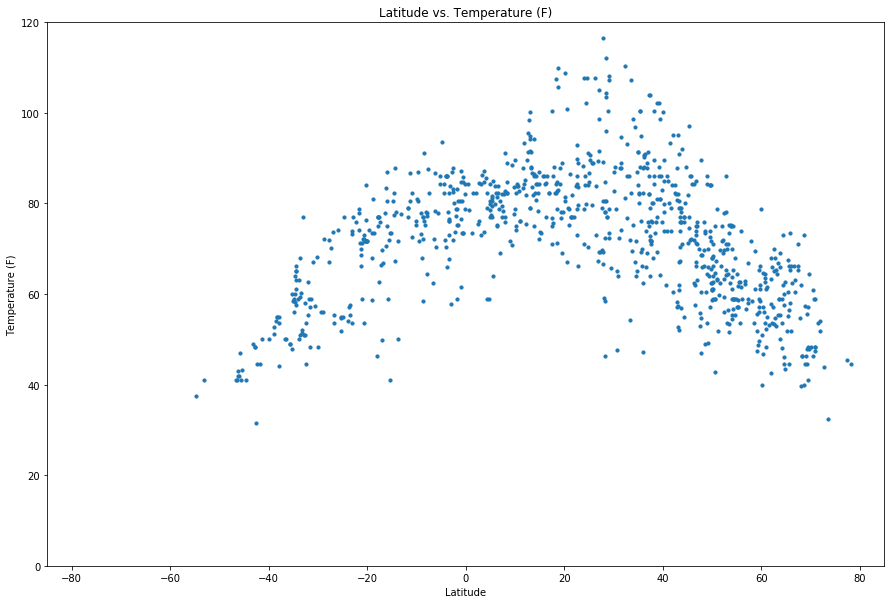

In [25]:
weather_df.plot(kind='scatter', x='Latitude', y='Max Temp (F)', figsize=(15,10), s=10)
plt.xlim(-85, 85)
plt.ylim(0, 120)
plt.title('Latitude vs. Temperature (F)')
plt.ylabel('Temperature (F)')
plt.savefig('Output_Files/Latitude_vs_Temperature.png')

#### Latitude vs. Humidity Plot

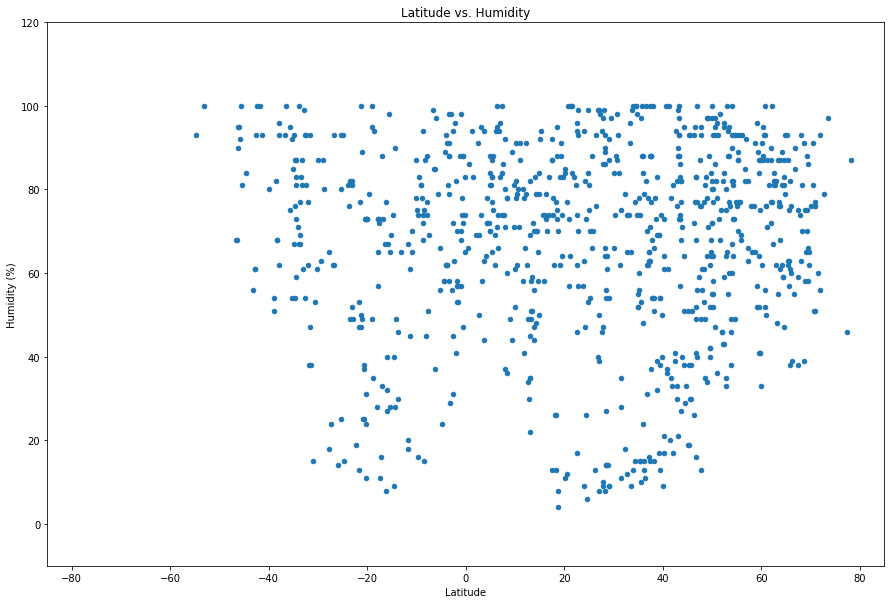

In [26]:
weather_df.plot(kind='scatter', x='Latitude', y='Humidity', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-10, 120)
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.savefig('Output_Files/Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

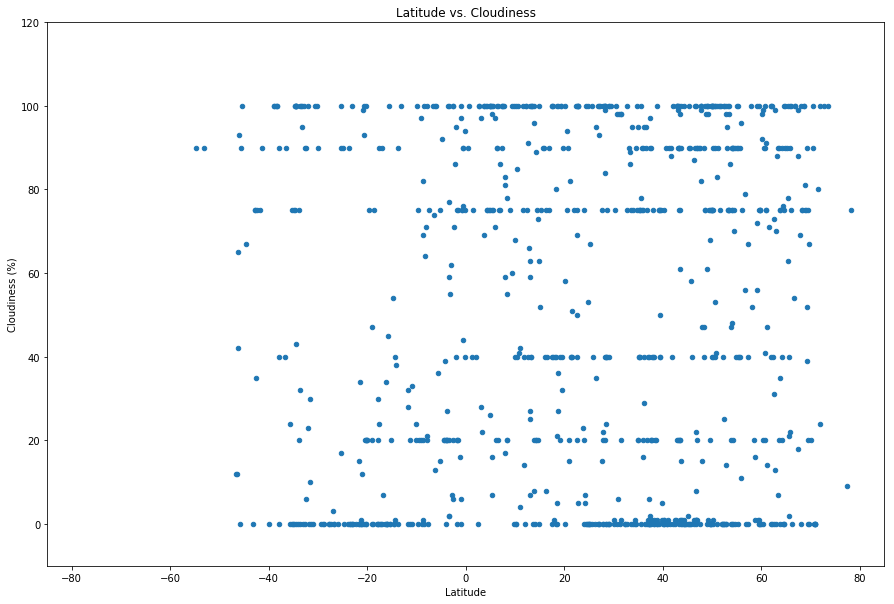

In [21]:
weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-10, 120)
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.savefig('Output_Files/Latitude_vs_Temperature.png')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (MPH)')

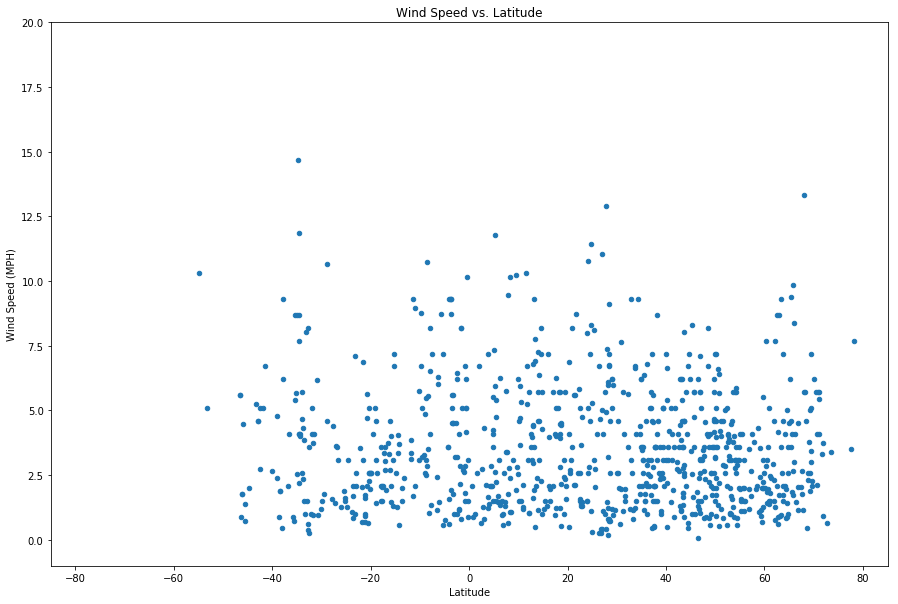

In [20]:
weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-1, 20)
plt.title('Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (MPH)')